# Deep Learning Homework Assignement 1

## Simple Classification

In the first task, we are going to use the code below that generates 3 geometrical shapes (triangle, rectangle and cercle). These shapes and their labels will be our data, then we are using a simple linear neural network to learn to classify the data. We start first with the code to generate the data.

In [1]:
### Importing needed packages
import matplotlib.pyplot as plt
import numpy as np
import keras as ks
import matplotlib.patches as patches

### Defining data generation functions
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]


def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    #print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




Using TensorFlow backend.


For example, we have the following images.

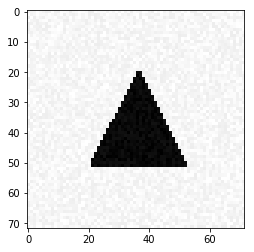

In [2]:
IMAGE_SIZE = 72
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

Using these functions, we create our dataset for classification. It is important to convert the labels to categorical variables before using the data to train the neural network

Creating data:
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]


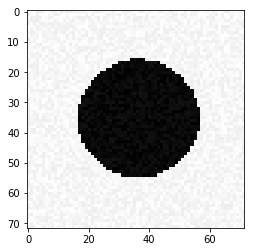

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20);
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3) ### 3 classes 
plt.imshow(X_train[206].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[206]) 
plt.imshow(X_train[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[1]) 
plt.imshow(X_train[15].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[15])

We start by building a stochastic gradient descent classifier. We use a function to plot the historical loss for each epoch. The result is as in the following.

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD 

def loss_history(results):    
    # history for loss
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def classifieur_SGD(X_train, Y_train, X_test):
    nb_neurons = 3 
    model = Sequential([Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,))])
    model.add(Dense(3))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])
    results = model.fit(X_train, Y_train, epochs=30, validation_split=0.3,batch_size=32)
    loss_history(results)
    Y_pred = model.predict(X_test)
    weights=model.get_weights()
    return(Y_pred, weights)

Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 0s 845us/step - loss: 1.1027 - acc: 0.3762 - val_loss: 1.0355 - val_acc: 0.3778
Epoch 2/30
210/210 [==============================] - 0s 119us/step - loss: 1.0579 - acc: 0.4143 - val_loss: 1.0201 - val_acc: 0.4778
Epoch 3/30
210/210 [==============================] - 0s 114us/step - loss: 1.0350 - acc: 0.4476 - val_loss: 1.0195 - val_acc: 0.4444
Epoch 4/30
210/210 [==============================] - 0s 114us/step - loss: 1.0271 - acc: 0.4619 - val_loss: 1.0110 - val_acc: 0.5000
Epoch 5/30
210/210 [==============================] - 0s 119us/step - loss: 1.0154 - acc: 0.4810 - val_loss: 0.9976 - val_acc: 0.5000
Epoch 6/30
210/210 [==============================] - 0s 100us/step - loss: 1.0030 - acc: 0.4905 - val_loss: 0.9876 - val_acc: 0.5111
Epoch 7/30
210/210 [==============================] - 0s 100us/step - loss: 0.9921 - acc: 0.5095 - val_loss: 0.9772 - val_acc: 0.5111
Epoch 8/30
210/21

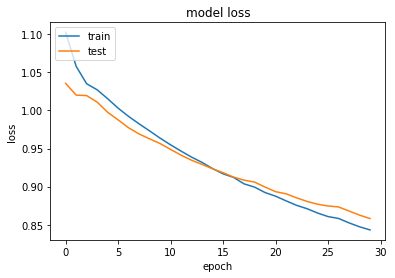

[2.4608507e-26 1.0000000e+00 0.0000000e+00]


In [5]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
Y_pred, WSGD = classifieur_SGD(X_train, Y_train, X_test)
print(max(Y_pred))

We now use the Adam optimizer. The adam optimizer usually leads to better results than stochastic gradient descent. For example, stochastic gradient descent fails to update when it gets to a cost function plateau. As adam combines previous steps with current gradient step, the problem is not encountered. 

Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 0s 2ms/step - loss: 2.5428 - acc: 0.3381 - val_loss: 1.2839 - val_acc: 0.3889
Epoch 2/30
210/210 [==============================] - 0s 114us/step - loss: 1.3939 - acc: 0.3905 - val_loss: 1.0979 - val_acc: 0.4000
Epoch 3/30
210/210 [==============================] - 0s 109us/step - loss: 1.0651 - acc: 0.4333 - val_loss: 0.9741 - val_acc: 0.5222
Epoch 4/30
210/210 [==============================] - 0s 109us/step - loss: 0.7667 - acc: 0.6000 - val_loss: 0.7319 - val_acc: 0.6000
Epoch 5/30
210/210 [==============================] - 0s 119us/step - loss: 0.6251 - acc: 0.6619 - val_loss: 0.6193 - val_acc: 0.7000
Epoch 6/30
210/210 [==============================] - 0s 133us/step - loss: 0.5633 - acc: 0.6857 - val_loss: 0.5653 - val_acc: 0.6667
Epoch 7/30
210/210 [==============================] - 0s 114us/step - loss: 0.5404 - acc: 0.6905 - val_loss: 0.5236 - val_acc: 0.8111
Epoch 8/30
210/210 

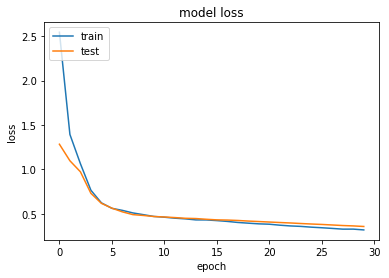

In [6]:
from keras.optimizers import Adam 

def classifieur_Adam(X_train, Y_train, X_test):
    nb_neurons = 3 
    model = Sequential([Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,))])
    model.add(Dense(3))
    model.add(Activation('softmax'))
    adam=Adam(lr=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])
    results = model.fit(X_train, Y_train, epochs=30, validation_split=0.3,batch_size=32)
    loss_history(results)
    Y_pred = model.predict(X_test)
    weights=model.get_weights()
    return(Y_pred, weights)
    return(Y_pred, weights)
Y_pred, WADAM = classifieur_Adam(X_train, Y_train, X_test)

We indeed notice that the accuracy with this optimizer is much higher

## Weight Visualisation

The neural network's final classification is based on the last layer's weights. We can visualize them very easily using plt plots.

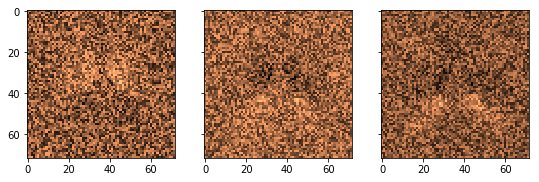

In [7]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(9, 3))
ax1.imshow(WADAM[0][:,0].reshape(72,72), cmap='copper')
ax2.imshow(WADAM[0][:,1].reshape(72,72), cmap='copper')
ax3.imshow(WADAM[0][:,2].reshape(72,72), cmap='copper')

plt.show()

## Classification with convolutional network

The last neural network is a bit too simple. We try to complexify it using convolutionnal architecture. 

In [8]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
[X_test, Y_test] = generate_test_set_classification()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1) 
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
Y_train = np_utils.to_categorical(Y_train, 3) ### 3 classes 

def modele_conv():
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D

    model = Sequential() 
    model.add(Conv2D(16, kernel_size = (5, 5), strides =(1,1), padding = 'same',  activation='relu', input_shape=(72, 72,1 )))
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    
    from keras.layers import Dropout 
    model.add(Dropout(0.5))

    from keras.layers import Flatten
    model.add(Flatten())

    from keras.layers import Dense 
    model.add(Dense(3, activation = 'softmax'))

    return model

model = modele_conv()

epoch = 50
lr = 0.0005
decay = lr / epoch
split = 0.2

from keras.optimizers import Adam, SGD
sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam(lr=lr, decay = decay)
crssent ='categorical_crossentropy'
mse = 'mean_squared_error'
model.compile(loss=crssent, optimizer=adam, metrics=['accuracy']) 
model.fit(X_train, Y_train, batch_size=32, epochs=epoch,validation_split=split, verbose=1)

Creating data:
Creating data:
(600, 5184)
(600, 72, 72, 1)
Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 1.1379 - acc: 0.3625 - val_loss: 1.0598 - val_acc: 0.4083
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.9886 - acc: 0.5417 - val_loss: 0.9877 - val_acc: 0.6250
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.8775 - acc: 0.6687 - val_loss: 0.9569 - val_acc: 0.5833
Epoch 4/50
480/480 [==============================] - 2s 4ms/step - loss: 0.7936 - acc: 0.7146 - val_loss: 0.8982 - val_acc: 0.5583
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.7775 - acc: 0.6521 - val_loss: 0.8441 - val_acc: 0.6583
Epoch 6/50
480/480 [==============================] - 3s 6ms/step - loss: 0.7213 - acc: 0.6958 - val_loss: 0.8662 - val_acc: 0.6250
Epoch 7/50
480/480 [==============================] - 3s 7ms/step - loss: 0.6695 - acc: 0.7667 - val_lo

On arrive a une accuracy de 98%.

In [9]:
score_train= model.evaluate(X_train, Y_train)

score_test= model.evaluate(X_test, Y_test)
print("The train loss= ",score_train)
print("The test  loss= ",score_test)

300/300 [==============================] - 0s 2ms/step
The train loss=  [0.26826727112134297, 0.9333333333333333]
The test  loss=  [0.6445311379432678, 0.7533333333333333]


## A regression Task

The goal now is to predict the image locations of the vertices of a triangle, given an image of this triangle. We quickly encounter a problem because the vertices of the triangle have random locations. We need to sort them (such that we can say verticle 1, vertice 2 .. )

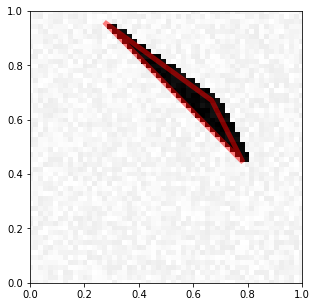

In [10]:
## Generating Regression Data
[X_train, Y_train] = generate_dataset_regression(1000, 20)
visualize_prediction(X_train[0], Y_train[0])

In [11]:
X_train = X_train.reshape(X_train.shape[0], 72,72,1)
Y_train = Y_train.reshape(Y_train.shape[0], 3,2)
Y_train = np.array([i[i[:,0].argsort()] for i in Y_train]) 
Y_train = Y_train.reshape(Y_train.shape[0], 6,)

We use a similar convolutional architecture and we get the following (more complex) model

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from keras.optimizers import Adam,SGD


def model_regressor():
    model = Sequential()
    nb_neurons = 16
    
    model.add(Conv2D(nb_neurons, kernel_size = (5, 5), strides =(1,1), padding ='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Conv2D(2* nb_neurons, kernel_size = (5, 5), strides =(1,1), padding ='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
        
    model.add(Flatten()) 
    model.add(Dense(128))
    model.add(Activation('relu'))
   
    model.add(Dense(6))
    model.add(Activation('linear'))

    return model

In [15]:
model = model_regressor()

epoch = 50
lr = 0.0001
from keras.optimizers import Adam
adam=Adam(lr=lr, decay = 0.9)
mse = 'mean_squared_error'
model.compile(loss=mse, optimizer=adam) 
model.fit(X_train, Y_train, batch_size=32, epochs=epoch,validation_split=0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 17s 24ms/step - loss: 3.0131 - val_loss: 0.3958
Epoch 2/50
700/700 [==============================] - 17s 24ms/step - loss: 2.3972 - val_loss: 0.3814
Epoch 3/50
700/700 [==============================] - 26s 37ms/step - loss: 2.1663 - val_loss: 0.3662
Epoch 4/50
700/700 [==============================] - 22s 31ms/step - loss: 2.1067 - val_loss: 0.3559
Epoch 5/50
700/700 [==============================] - 17s 24ms/step - loss: 2.0607 - val_loss: 0.3506
Epoch 6/50
700/700 [==============================] - 15s 22ms/step - loss: 1.9857 - val_loss: 0.3483
Epoch 7/50
700/700 [==============================] - 15s 22ms/step - loss: 1.9885 - val_loss: 0.3465
Epoch 8/50
700/700 [==============================] - 15s 22ms/step - loss: 1.8985 - val_loss: 0.3451
Epoch 9/50
700/700 [==============================] - 16s 22ms/step - loss: 1.9679 - val_loss: 0.3416
Epoch 10/50
700/700 [===============

[ 0.06826206 -0.18910867  0.13920842  0.98657894  0.7655704  -0.06054115] 
 [0.36340393 0.33217252 0.67661723 0.27556678 0.94133439 0.93818117]


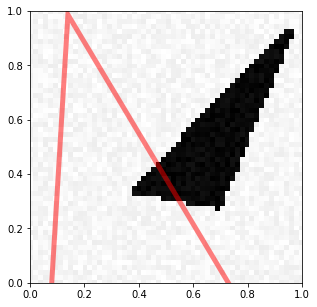

In [16]:
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0], 72,72,1)
Y_test = Y_test.reshape(Y_test.shape[0], 3,2)
Y_test = np.array([i[i[:,0].argsort()] for i in Y_test])
Y_test = Y_test.reshape(Y_test.shape[0], 6,)
Y_pred = model.predict(X_test)

print(Y_pred[0], "\n", Y_test[0])
visualize_prediction(X_test[0], Y_pred[0])

# Image Denoising

Finally, we tackle the topic of image denoising using an U net architecture. We first write a function code that generates images with/without noise. Then we use them in an hourglass CNN network to perform the denoising.

In [17]:
def generate_a_noisy_rectangle(noise, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, noise)


def generate_a_noisy_disk(noise, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, noise)

def generate_a_noisy_triangle(noise, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, noise)

def generate_dataset_denoising(nb_samples, noise, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X_free = np.zeros([nb_samples,im_size])
    X_noise = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X_free[i], X_noise[i] = generate_a_noisy_rectangle(noise, free_location)
        elif category == 1: 
            X_free[i], X_noise[i] = generate_a_noisy_disk(noise, free_location)
        else:
            X_free[i], X_noise[i] = generate_a_noisy_triangle(noise, free_location)
    X_noise = (X_noise + noise) / (255 + 2 * noise)
    X_free = X_free / 255
    return [X_free, X_noise]

In [22]:
[X_free, X_train] =generate_dataset_denoising(300,80)
X_train=X_train.reshape(X_train.shape[0] ,72,72,1 )
X_free=X_free.reshape(X_train.shape[0] ,72,72,1 )

Creating data:


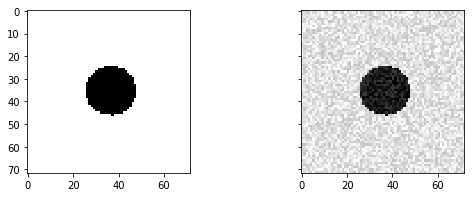

In [23]:
f, (free, noisy) = plt.subplots(1, 2, sharey=True,figsize=(9, 3))
free.imshow(X_free[206].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
noisy.imshow(X_train[206].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.show()

In [24]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from keras.optimizers import Adam,SGD


def hourglass_model():
    model = Sequential()

    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1),padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
    model.add(UpSampling2D((2, 2),data_format = "channels_last"))

    model.add(Conv2DTranspose(32, kernel_size =(5,5), strides=(1,1), data_format = "channels_last",activation='relu'))
    model.add(Dropout(0.5))
    model.add(UpSampling2D((2, 2),data_format = "channels_last"))
  

    model.add(Conv2D(16, (5, 5), activation='relu',padding='same'))
    model.add(Conv2D(1, (3, 3), activation='relu',padding='same'))
    model.add(Conv2D(1, (1, 1), activation='sigmoid' ,padding='same'))

    return model

lr = 0.0001
decay = lr / 50
from keras.optimizers import Adam
adam=Adam(lr=lr, decay = 0.9)
autoencodeur = hourglass_model()
autoencodeur.compile(loss='mean_squared_error',optimizer=adam)
autoencodeur.fit(X_train, X_free, epochs=50, verbose=1, batch_size=32)
    

Epoch 1/50
300/300 [==============================] - 15s 50ms/step - loss: 0.2437
Epoch 2/50
300/300 [==============================] - 19s 63ms/step - loss: 0.2397
Epoch 3/50
300/300 [==============================] - 17s 56ms/step - loss: 0.2377
Epoch 4/50
300/300 [==============================] - 16s 53ms/step - loss: 0.2362
Epoch 5/50
300/300 [==============================] - 17s 56ms/step - loss: 0.2351
Epoch 6/50
300/300 [==============================] - 17s 55ms/step - loss: 0.2341
Epoch 7/50
300/300 [==============================] - 16s 53ms/step - loss: 0.2333
Epoch 8/50
300/300 [==============================] - 18s 61ms/step - loss: 0.2326
Epoch 9/50
300/300 [==============================] - 14s 46ms/step - loss: 0.2319
Epoch 10/50
300/300 [==============================] - 14s 45ms/step - loss: 0.2314
Epoch 11/50
300/300 [==============================] - 13s 44ms/step - loss: 0.2309
Epoch 12/50
300/300 [==============================] - 13s 45ms/step - loss: 0.2304
E

Creating data:


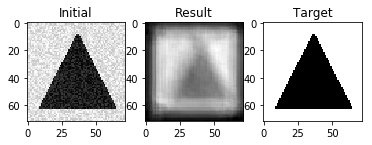

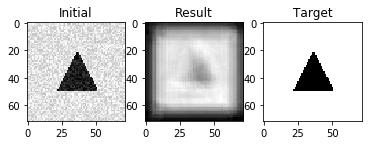

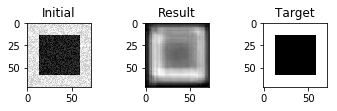

In [25]:
[X_target, X_test] =generate_dataset_denoising(3,80)
X_result = autoencodeur.predict(X_test.reshape(3,72,72,1))
plt.subplot(131)
plt.title('Initial')
plt.imshow(X_test[0].reshape(72,72), cmap='gray')

plt.subplot(132)
plt.title('Result')
plt.imshow(X_result[0].reshape(72,72), cmap='gray')

plt.subplot(133)
plt.title('Target')
plt.imshow(X_target[0].reshape(72,72), cmap = 'gray')
plt.show()

plt.subplot(231)
plt.title('Initial')
plt.imshow(X_test[1].reshape(72,72), cmap='gray')

plt.subplot(232)
plt.title('Result')
plt.imshow(X_result[1].reshape(72,72), cmap='gray')

plt.subplot(233)
plt.title('Target')
plt.imshow(X_target[1].reshape(72,72), cmap = 'gray')
plt.show()

plt.subplot(331)
plt.title('Initial')
plt.imshow(X_test[2].reshape(72,72), cmap='gray')

plt.subplot(332)
plt.title('Result')
plt.imshow(X_result[2].reshape(72,72), cmap='gray')

plt.subplot(333)
plt.title('Target')
plt.imshow(X_target[2].reshape(72,72), cmap = 'gray')


plt.show()

For the two previous tasks, we notice that even though the model might work on training data, overfitting is a very commun issue and getting good performances on test set is not guaranteed